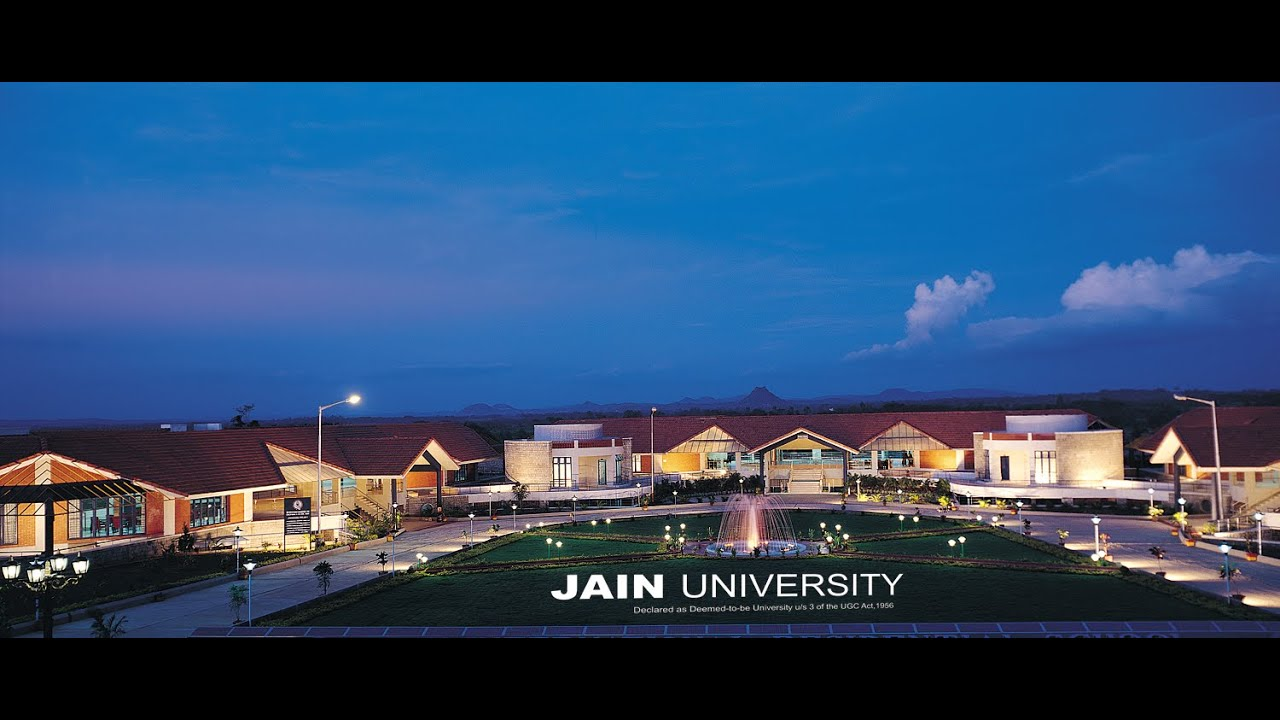

**This notebook will explore student placement data from Jain University in Bangalore. It will clean, visually explore, and build a logistic model to predict placement status.**

In [ ]:
#import a few libraries that will be used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#read in the data and examine the first 5 observations to get a feel for it
df = pd.read_csv("../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv") 
df.head()

In [ ]:
#Assess how many null values are in the dataframe
df.isnull().sum()

**There are only null values in the salary field for candidates that were not placed. Since they are not placed, their salary can be replaced with a 0. Next we'll take a look to see if there are any strange values with the numeric variables. The only strange variable is salary, which may contain an outlier. the 75th percentile is 282.5K.**

In [ ]:
df = df.fillna(0) #fill in null salary values with 0 since it's for students that were not placed.
df.describe()

**Next we'll get an understanding of more specific data:**
* Male/Female percentages
* Placed/Not Placed percentages
* Specialisation percentages
* Work Experience percentages
* Undergrad Degree percentages

**I've hidden the code since it's a little long, but feel free to expand it**

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('black')
plt.rcParams['text.color'] = 'white'
my_circle=plt.Circle( (0,0), 0.7, color='black')

plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct="%1.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('black')
plt.rcParams['text.color'] = 'white'
my_circle=plt.Circle( (0,0), 0.7, color='black')

plt.pie(df['status'].value_counts(), labels=df['status'].value_counts().index, autopct="%1.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('black')
plt.rcParams['text.color'] = 'white'
my_circle=plt.Circle( (0,0), 0.7, color='black')

plt.pie(df['specialisation'].value_counts(), labels=df['specialisation'].value_counts().index, autopct="%1.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('black')
plt.rcParams['text.color'] = 'white'
my_circle=plt.Circle( (0,0), 0.7, color='black')

plt.pie(df['workex'].value_counts(), labels=df['workex'].value_counts().index, autopct="%1.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('black')
plt.rcParams['text.color'] = 'white'
my_circle=plt.Circle( (0,0), 0.7, color='black')

plt.pie(df['degree_t'].value_counts(), labels=df['degree_t'].value_counts().index, autopct="%1.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**There's a few things we can take from these plots:**

1. There's a significant differenec in the gender count; Males account for nearly 2 times the female count.
2. Just over 2/3 of the population have been placed into jobs.
3. The specialisation is almost split evenly.
4. Just over 2/3 of the population did not have work experience.
5. Comm&Mgmt is the highest undergrad degree represented with over 2/3 of the population, followed by Sci&Tech.

**Let's take a closer look at the gender aspect. Below we see that the placed to not placed ratio by gender highly favors the males (not placed accounts for 1/3 of the male population), while while it is highly unfavorable for the females (almost 50% not placed). We'll keep this in mind for modeling later on, as gender should be a significant effect. The boxplot shows that the mean salary between genders does not greatly differ, but the male salary certainly has more range.**

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="gender", hue="status", data=df) #plot placement status by gender

In [ ]:
sns.boxplot( x="salary", y='gender', width =0.5, data = df); #boxplot of salary by gender
plt.show()

**In order to begin modeling, we'll need to set some of the categorical variables as numeric binary 0's and 1's since we're performing logistical regression. We'll also drop a few variables that should have no impact on placement (ex: salary, early education grades, etc..)**

In [ ]:
df1 = df
df1['gender'].replace({"M":0, "F":1}, inplace=True)
df1['hsc_b'].replace({"Others":0, "Central":1}, inplace=True)
df1['workex'].replace({"No":0, "Yes":1}, inplace=True)
df1['status'].replace({"Not Placed":0, "Placed":1}, inplace=True)
df1['specialisation'].replace({"Mkt&HR":0, "Mkt&Fin":1}, inplace=True)

df1['hsc_s_commerce'] = np.where(df1['hsc_s'] == 'Commerce',1,0)
df1['hsc_s_Science'] = np.where(df1['hsc_s'] == 'Science',1,0)
df1['hsc_s_Arts'] = np.where(df1['hsc_s'] == 'Arts',1,0)
df1['degree_sci&tech'] = np.where(df1['degree_t'] == 'Sci&Tech',1,0)
df1['degree_comm&mgmt'] = np.where(df1['degree_t'] == 'Comm&Mgmt',1,0)
df1['degree_other'] = np.where(df1['degree_t'] == 'Others',1,0)

df1=df1.drop(['sl_no','ssc_p','ssc_b','hsc_s','degree_t','salary'],axis=1)

**Legend**
* gender: 1 = Female, 0 = Male
* hsc_b: 1 = Central, 0 = Others
* workex: 1= Yes, 0 = No
* status: 1 = Placed, 0 = Not Placed
* hsc_s_SPECIALISATION: 1 = True, 0 = False
* degree_NAME: 1 = True, 0 = False


In [ ]:
#import some sklearn modules in order to perform the regresison
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df1.head() #look at the first 5 observations to ensure coding is correct

In [ ]:
x = df1.drop('status', axis=1) #create df with only effect variables
y = df1.status #create df with only response variable
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4) #split frames into testing and training
logistic_regression = LogisticRegression(max_iter=500)

In [ ]:
logistic_regression.fit(x_train, y_train) #fit the training df's to a logistic regression model

In [ ]:
y_pred = logistic_regression.predict(x_test) #predict y values with the model that was fit above
accuracy = metrics.accuracy_score(y_test, y_pred) #calculate accuracy of the prediction to actual values
accuracy_percentage = 100 * accuracy
print(accuracy_percentage)

**This model predicted placement status with 83.33% accuracy against the test dataframe. That's a great prediction rate! I would be interested to see the results on additional datasets.**

**Since Scikit-learn does not support statistical inference, if we want an ANOVA table of the effects with coefficents and p-values, we'll need to build the same model from statsmodels.**

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())
print(logit_model.fit().params)

**Surprisingly, gender is not a significant factor when determining placement status (P>0.05).**

**There are only 4 effects that are significant: hsc_p, degree_p, workex, and mba_p. From the effect coefficients, we can infer that the higher the percentile in higher education and degree, the more likely a student is to be placed. Workex is also a contributing factor, and if a student has workex, they are more likely to be placed. The last factor, mba_p, is curious. It appears that the higher percentile, the lower the probability a student will be placed. I'd recommend futher investigation into this factor. Perhaps lower grades are accompanied with placement due to time constraints and studying.**